In [2]:
import pandas as pd
import numpy as np
import joblib
import json
from sklearn.model_selection import train_test_split

#Read dataset in
df = pd.read_csv('cps_data_2010_2020.csv')
print(df.head(2))
str_cols = ['stfips' , 'prcitshp', 'ftpt94','class94',  'docc00', 'dind02','occ']
dicts = []
#Make string columns into labels (classes) and log the mappings
for s in str_cols:
    df[s] = df[s].astype('category')
    df[s+'_class'] = df[s].cat.codes
    tmp = dict(zip(df[s].cat.codes, df[s]))
    dicts.append(tmp)

for i in range(len(str_cols)):
    with open(str_cols[i]+".json", 'w') as f: 
        json.dump(dicts[i], f)



print("done label_encoding and dumping")

  stfips  cbsafips   age  sex  grade92  race  ethnic  marital  \
0     AL     33660  58.0    2       40     1     0.0        1   
1     AL     33860  44.0    2       44     2     0.0        1   

             prcitshp                      ftpt94              class94  \
0  Native, Born In US  FT Hours (35+), Usually FT  Private, For Profit   
1  Native, Born In US     Not At Work, Usually FT   Government - State   

   earnwke                                         docc00  \
0   507.69  Office and administrative support occupations   
1  1038.46   Education, training, and library occupations   

                 dind02                                                occ  \
0             Hospitals  First-line supervisors/managers of office and ...   
1  Educational services              Elementary and middle school teachers   

   annual_earn  annual_earn_adj  
0     26399.88       37223.8308  
1     53999.92       76139.8872  
done label_encoding and dumping


In [6]:

df.head(4).to_csv("unclassed.csv")

labels = np.array(df['annual_earn_adj'])
#prepare dataset for splitting
for s in str_cols:
    df = df.drop(s, axis=1)
df = df.drop('annual_earn', axis=1)
df = df.drop('earnwke',axis=1)
df = df.drop('annual_earn_adj',axis=1)

df.head(4).to_csv("classed.csv")

print("done dropping cols and dumping sample into csv")


done dropping cols and dumping sample into csv


In [7]:

#splitting dataset into train and test set
feature_list = list(df.columns)
print(feature_list)
features = np.array(df)
print('spltting data!')
random_state = 42
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = random_state)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


['cbsafips', 'age', 'sex', 'grade92', 'race', 'ethnic', 'marital', 'stfips_class', 'prcitshp_class', 'ftpt94_class', 'class94_class', 'docc00_class', 'dind02_class', 'occ_class']
spltting data!
Training Features Shape: (1137240, 14)
Training Labels Shape: (1137240,)
Testing Features Shape: (379081, 14)
Testing Labels Shape: (379081,)


In [1]:

#Training the Model!


# Import the model we are using
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Setup exploratory grid of parameters:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}


# Load grid into Cross-Validation search:
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(train_features, train_labels)

#load them best parameters 
# # Instantiate model with 300 decision trees
# rf = RandomForestRegressor(n_estimators = 300, min_samples_split = 0.2, min_samples_leaf = 4, max_features=len(feature_list)-5, max_depth= 90,bootstrap=True,random_state = random_state,verbose=2, n_jobs = -1)
# # Train the model on training data
# rf.fit(train_features, train_labels)

# # Use the forest's predict method on the test data
# print("Training Score:")
# print(rf.score(train_features, train_labels))
# print("Testing Score:")
# print(rf.score(test_features, test_labels))

# joblib.dump(rf, "./random_forest5.joblib")





In [26]:


from joblib import dump, load
rf5 = load('random_forest4.joblib') 
print("Testing Score:")
print(rf5.score(test_features, test_labels))

print(df.iloc[50])
row = df.iloc[50].values.reshape(1, -1)
print(row)

print(labels[50])


pred = rf5.predict(row)
print(pred)


KeyboardInterrupt: 

cbsafips          13820.0
age                  53.0
sex                   1.0
grade92              39.0
race                  1.0
ethnic                0.0
marital               1.0
stfips_class          1.0
prcitshp_class        3.0
ftpt94_class          0.0
class94_class         3.0
docc00_class         18.0
dind02_class         33.0
occ_class           186.0
Name: 50, dtype: float64
[[1.382e+04 5.300e+01 1.000e+00 3.900e+01 1.000e+00 0.000e+00 1.000e+00
  1.000e+00 3.000e+00 0.000e+00 3.000e+00 1.800e+01 3.300e+01 1.860e+02]]
44725.2
[55867.89335245]


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


MemoryError: Unable to allocate 3.14 TiB for an array with shape (1137240, 379081) and data type float64

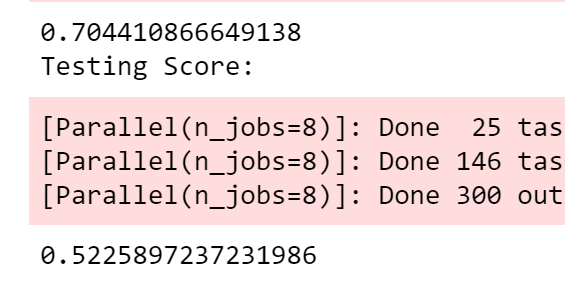
